# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# Data Understanding

In [3]:
data.shape

(244, 7)

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
data.describe(include=object).T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


In [7]:
data['total_bill'].groupby(data['time']).agg({'sum','min','max','mean'})

,min,max,sum,mean
time,,,,
Dinner,3.07,50.81,3660.30,20.797159
Lunch,7.51,43.11,1167.47,17.168676


In [8]:
data["total_bill"].groupby([data["day"], data["time"]]).agg({"sum", "min", "max", "mean"})

min    max      sum       mean
day  time                                    
Fri  Dinner   5.75  40.17   235.96  19.663333
     Lunch    8.58  16.27    89.92  12.845714
Sat  Dinner   3.07  50.81  1778.40  20.441379
Sun  Dinner   7.25  48.17  1627.16  21.410000
Thur Dinner  18.78  18.78    18.78  18.780000
     Lunch    7.51  43.11  1077.55  17.664754

In [9]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
data["total_bill_tip_sum"] = data["total_bill"] + data["tip"]
data = data.sort_values(by="total_bill_tip_sum",ascending=False).head(30)
data.reset_index(drop=True)

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip_sum
0,50.81,10.00,Male,Yes,Sat,Dinner,3,60.81
1,48.33,9.00,Male,No,Sat,Dinner,4,57.33
2,48.27,6.73,Male,No,Sat,Dinner,4,55.00
3,48.17,5.00,Male,No,Sun,Dinner,6,53.17
4,45.35,3.50,Male,Yes,Sun,Dinner,3,48.85
5,43.11,5.00,Female,Yes,Thur,Lunch,4,48.11
6,39.42,7.58,Male,No,Sat,Dinner,4,47.00
7,44.30,2.50,Female,Yes,Sat,Dinner,3,46.80
8,41.19,5.00,Male,No,Thur,Lunch,5,46.19
9,40.17,4.73,Male,Yes,Fri,Dinner,4,44.90


# Pre-Processing

In [11]:
data.isnull().sum()

total_bill            0
tip                   0
sex                   0
smoker                0
day                   0
time                  0
size                  0
total_bill_tip_sum    0
dtype: int64

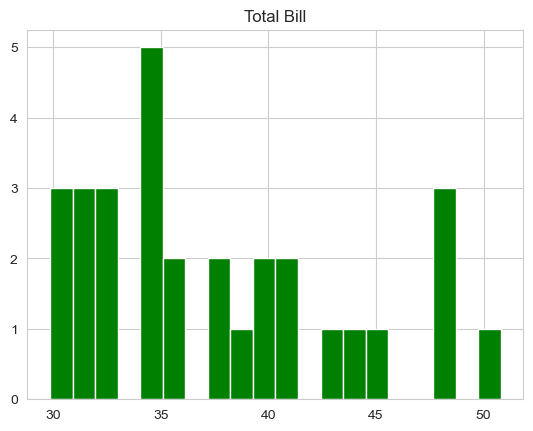

In [12]:
sns.set_style('whitegrid')
data['total_bill'].hist(bins=20,color='green')
plt.title('Total Bill')
plt.show()

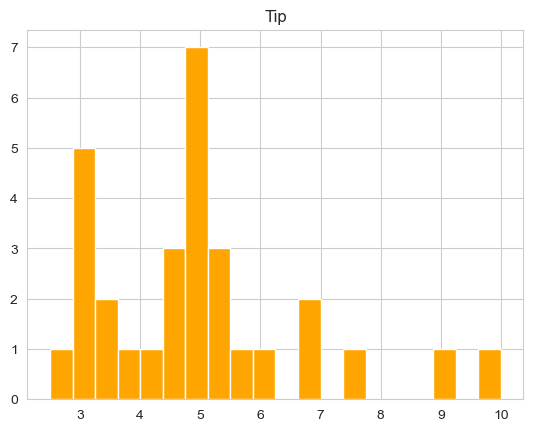

In [13]:
sns.set_style('whitegrid')
data['tip'].hist(bins=20,color='orange')
plt.title('Tip')
plt.show()

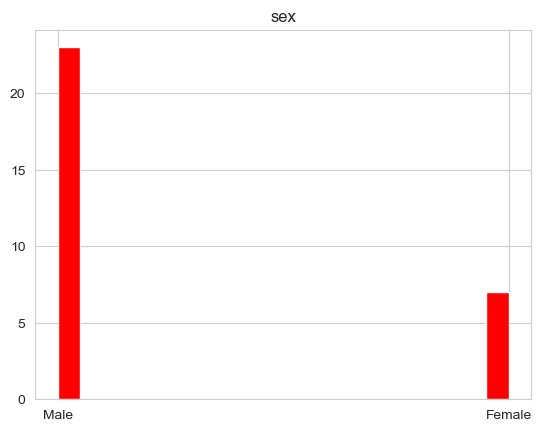

In [14]:
sns.set_style('whitegrid')
data['sex'].hist(bins=20,color='red')
plt.title('sex')
plt.show()

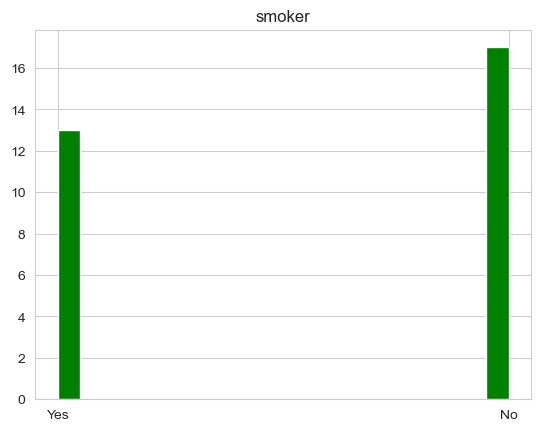

In [15]:
sns.set_style('whitegrid')
data['smoker'].hist(bins=20,color='green')
plt.title('smoker')
plt.show()

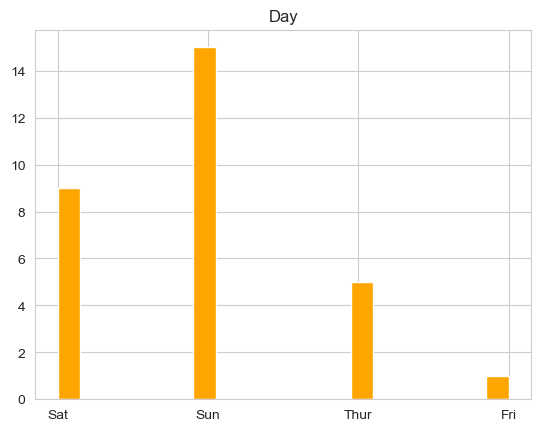

In [16]:
sns.set_style('whitegrid')
data['day'].hist(bins=20,color='orange')
plt.title('Day')
plt.show()

<Axes: xlabel='day', ylabel='total_bill'>

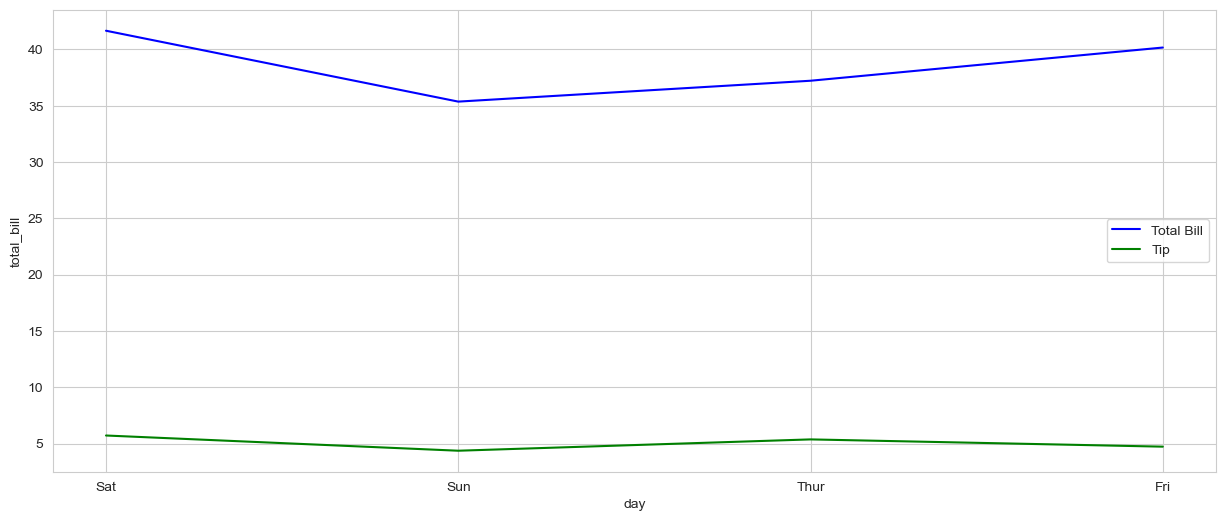

In [17]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data,x='day',y='total_bill',errorbar=None,color='blue',label='Total Bill')
sns.lineplot(data=data,x='day',y='tip',errorbar=None,color='green',label='Tip')

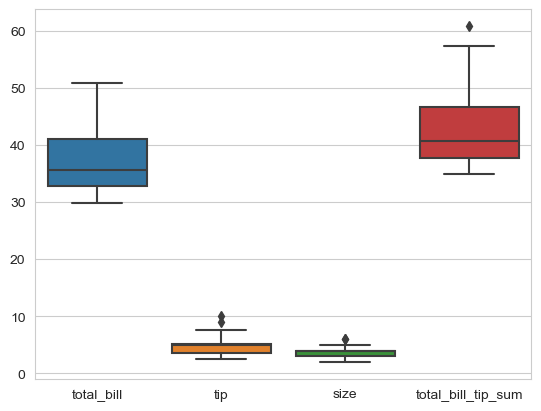

In [18]:
sns.boxplot(data)
plt.show()

In [19]:
data['total_bill_tip_sum'].unique()

array([60.81, 57.33, 55.  , 53.17, 48.85, 48.11, 47.  , 46.8 , 46.19,
       44.9 , 43.55, 42.07, 41.73, 41.01, 41.  , 40.5 , 40.26, 40.01,
       40.  , 38.4 , 38.33, 38.18, 37.68, 36.27, 36.21, 36.01, 36.  ,
       35.03, 35.  , 34.99])

In [20]:
data = data[data['total_bill_tip_sum']<58]

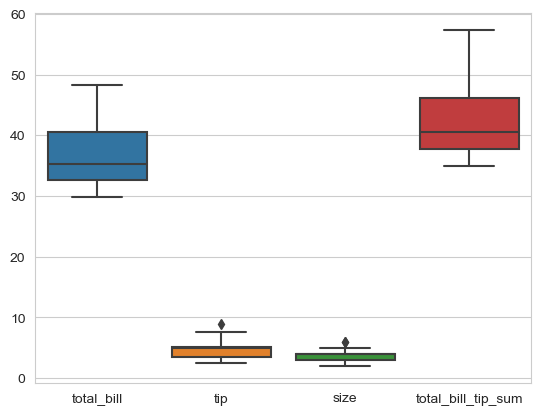

In [21]:
sns.boxplot(data)
plt.show()

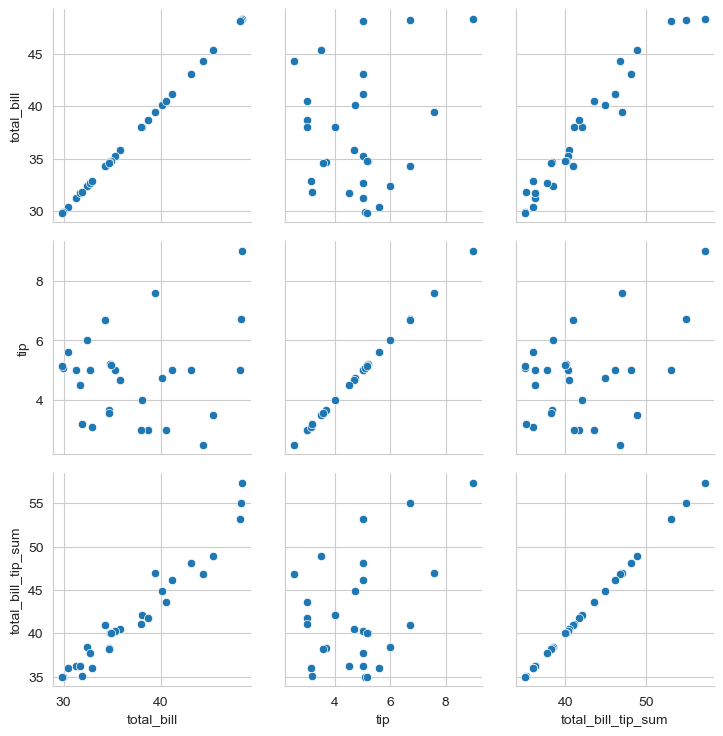

In [22]:
g = sns.PairGrid(data, vars=['total_bill', 'tip', 'total_bill_tip_sum'])
g.map(sns.scatterplot)
plt.show()

C:\Users\khali\AppData\Local\Temp\ipykernel_3316\771710820.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


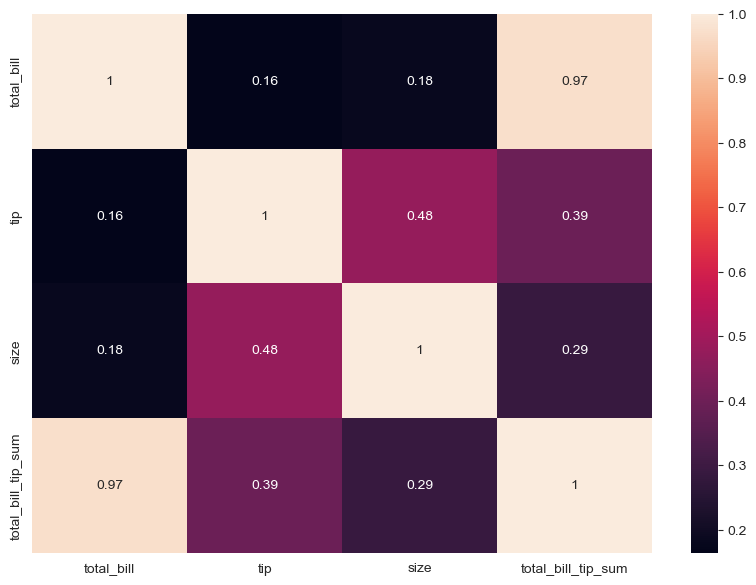

In [23]:
plt.figure(figsize=(10,7))
cor = data.corr()
sns.heatmap(cor,annot=True)
plt.show()

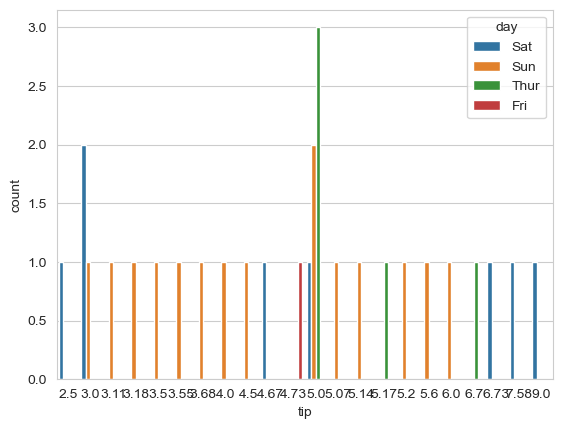

In [24]:
sns.countplot( x='tip', data=data, hue="day");

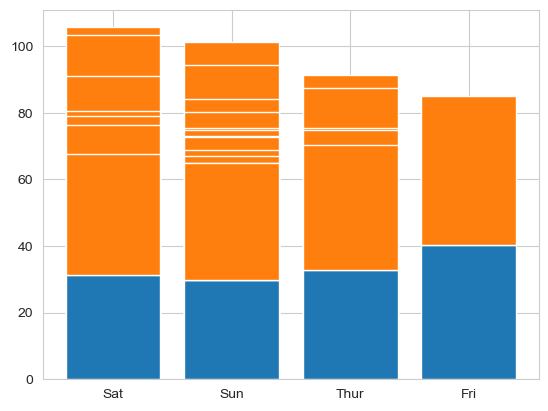

In [25]:
plt.bar(data['day'],data['total_bill'])
plt.bar(data['day'],data['total_bill_tip_sum'], bottom=data['total_bill'])
plt.show()

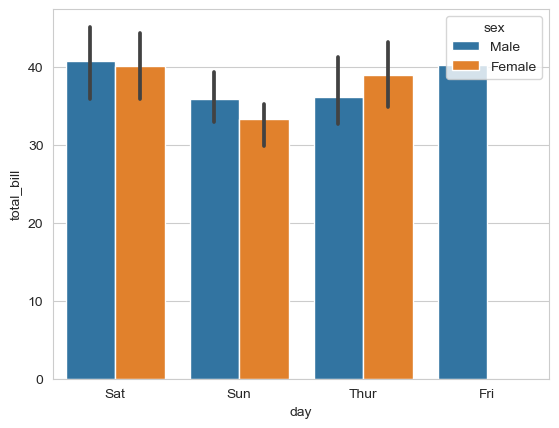

In [26]:
sns.barplot(x="day", y = "total_bill",hue="sex",data = data)
plt.show()

# Model Building

In [27]:
data.isnull().sum()

total_bill            0
tip                   0
sex                   0
smoker                0
day                   0
time                  0
size                  0
total_bill_tip_sum    0
dtype: int64

In [28]:
data = data.apply(lambda x: x.astype('category').cat.codes)
data.head(5)

,total_bill,tip,sex,smoker,day,time,size,total_bill_tip_sum
212,28,21,1,0,1,0,2,28
59,27,19,1,0,1,0,2,27
156,26,11,1,0,2,0,4,26
182,25,4,1,1,2,0,1,25
197,23,11,0,1,3,1,2,24


In [29]:
x = data[['total_bill','sex','smoker','day','time','size']]
y = data['tip']

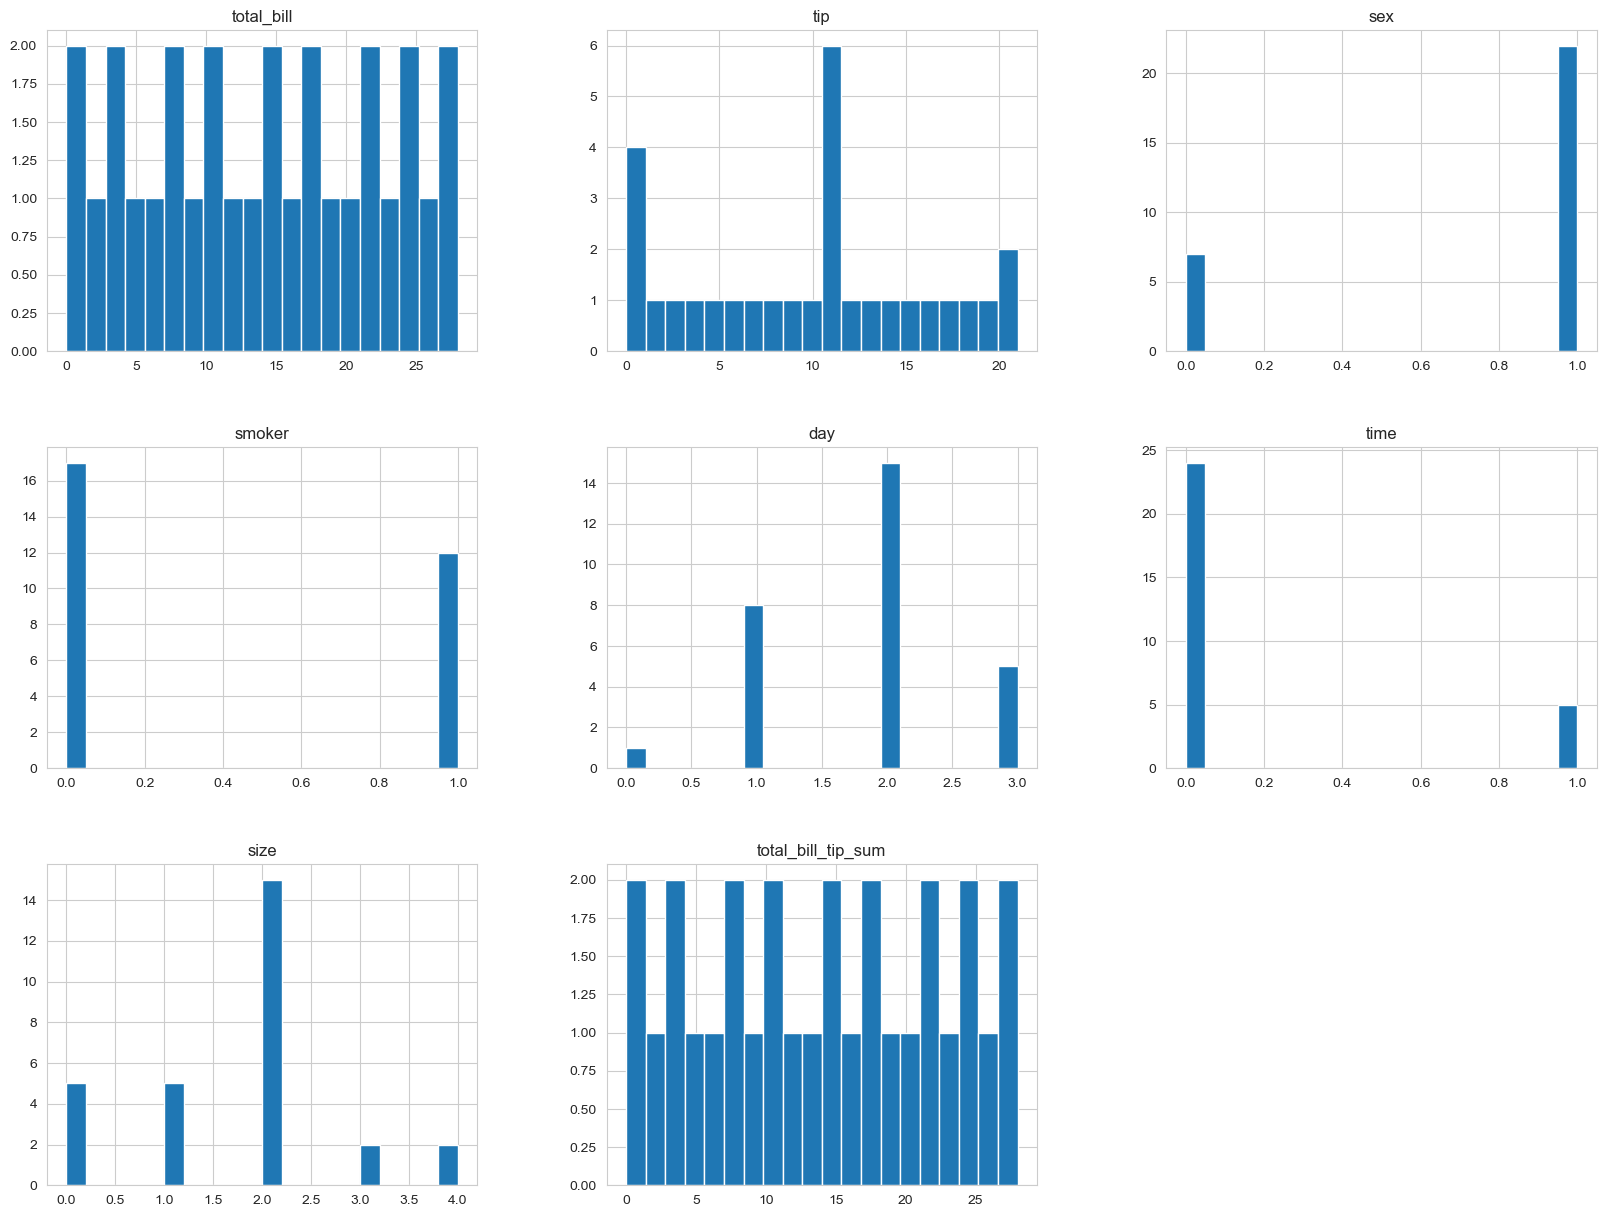

In [30]:
sns.set_style("whitegrid")
data.hist(bins=20 ,figsize=(20, 15))
plt.show()

In [31]:
#Scaling
#used for standardizing (scaling) numerical features in machine learning datasets.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
x=sc.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [35]:
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient: [ 0.03581056  0.63016475 -4.50001052 -1.52039629  2.46148315  0.35062352]
Intercept: 9.931034482758621


In [36]:
y_pred = model.predict(x_test)
y_pred

array([12.6399629 , 11.21442134,  5.60544667, 14.35394342,  7.66069735,
        2.92329799])

# Model Evaluation

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Regression Report:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r_squared}")


Regression Report:
Mean Absolute Error: 2.7745887146666273
Mean Squared Error: 9.395107633747237
Root Mean Squared Error: 3.0651439825475144
R-Squared: 0.6784944155751895


In [38]:
reference_value = 100 
mae_percentage = (mae / reference_value) * 100
mse_percentage = (mse / reference_value) * 100
rmse_percentage = (rmse / reference_value) * 100
print("Regression Report:")
print(f"Mean Absolute Error: {mae_percentage:.2f}%")
print(f"Mean Squared Error: {mse_percentage:.2f}%")
print(f"Root Mean Squared Error: {rmse_percentage:.2f}%")
print(f"R-Squared: {r_squared}")


Regression Report:
Mean Absolute Error: 2.77%
Mean Squared Error: 9.40%
Root Mean Squared Error: 3.07%
R-Squared: 0.6784944155751895
